# Documentation for Bitcoin Price Prediction Using LSTM and Strategy Generation

This documentation provides an overview of the process for predicting Bitcoin prices using a Long Short-Term Memory (LSTM) neural network and generating buy/sell signals based on the predictions. The steps include loading and preprocessing data, creating and training an LSTM model, making predictions, and generating trading signals.

## Table of Contents
1. [Introduction](#introduction)
2. [Libraries Required](#libraries-required)
3. [Data Loading and Preprocessing](#data-loading-and-preprocessing)
4. [Training and Testing Data Preparation](#training-and-testing-data-preparation)
5. [Building the LSTM Model](#building-the-lstm-model)
6. [Making Predictions](#making-predictions)
7. [Plotting Results](#plotting-results)
8. [Generating Buy/Sell Signals](#generating-buy/sell-signals)
9. [Full Code](#full-code)

## Introduction
The purpose of this project is to predict the closing price of Bitcoin using a Long Short-Term Memory (LSTM) neural network and generate trading signals based on the predictions.

## Libraries Required
The following libraries are required for this project:
- NumPy
- Pandas
- Matplotlib
- Scikit-learn
- TensorFlow

## Data Loading and Preprocessing
1. **Load Data**: Load the Bitcoin historical data from a CSV file.
2. **Preprocess Data**: Convert the 'Date' column to datetime format, set it as the index, and normalize the 'Close' prices using MinMaxScaler.

## Training and Testing Data Preparation
1. **Split Data**: Split the scaled data into training (80%) and testing (20%) sets.
2. **Create Dataset**: Create sequences of data for training and testing using a specified time step.

## Building the LSTM Model
1. **Define Model**: Create an LSTM model with two LSTM layers and Dropout layers to prevent overfitting.
2. **Compile Model**: Compile the model using the Adam optimizer and mean squared error loss function.
3. **Train Model**: Train the model on the training data for 50 epochs with a batch size of 32.

## Making Predictions
1. **Predict**: Use the trained model to make predictions on the training and testing data.
2. **Inverse Transform**: Inverse transform the predictions and true values to get them back to their original scale.

## Plotting Results
1. **Plot Original and Predicted Data**: Plot the original closing prices along with the training and testing predictions to visualize the performance of the model.

## Generating Buy/Sell Signals
1. **Buy/Sell Signal Function**: Define a function to generate buy/sell signals based on the predictions.
2. **Generate Signals**: Apply the function to the test predictions to generate trading signals.

## Summary
This documentation outlines the process of predicting Bitcoin prices using an LSTM model and generating trading signals. It involves data loading and preprocessing, model building, making predictions, and signal generation. The end result is a set of trading signals based on the predicted prices, which can be used to inform trading decisions.

Epoch 1/50
8/8 - 6s - loss: 0.1965 - 6s/epoch - 801ms/step
Epoch 2/50
8/8 - 1s - loss: 0.0283 - 629ms/epoch - 79ms/step
Epoch 3/50
8/8 - 0s - loss: 0.0159 - 450ms/epoch - 56ms/step
Epoch 4/50
8/8 - 0s - loss: 0.0122 - 392ms/epoch - 49ms/step
Epoch 5/50
8/8 - 0s - loss: 0.0104 - 381ms/epoch - 48ms/step
Epoch 6/50
8/8 - 0s - loss: 0.0081 - 377ms/epoch - 47ms/step
Epoch 7/50
8/8 - 0s - loss: 0.0068 - 403ms/epoch - 50ms/step
Epoch 8/50
8/8 - 0s - loss: 0.0080 - 415ms/epoch - 52ms/step
Epoch 9/50
8/8 - 0s - loss: 0.0069 - 383ms/epoch - 48ms/step
Epoch 10/50
8/8 - 0s - loss: 0.0063 - 376ms/epoch - 47ms/step
Epoch 11/50
8/8 - 0s - loss: 0.0067 - 378ms/epoch - 47ms/step
Epoch 12/50
8/8 - 0s - loss: 0.0078 - 371ms/epoch - 46ms/step
Epoch 13/50
8/8 - 0s - loss: 0.0071 - 366ms/epoch - 46ms/step
Epoch 14/50
8/8 - 0s - loss: 0.0066 - 386ms/epoch - 48ms/step
Epoch 15/50
8/8 - 0s - loss: 0.0072 - 373ms/epoch - 47ms/step
Epoch 16/50
8/8 - 0s - loss: 0.0069 - 380ms/epoch - 48ms/step
Epoch 17/50
8/8 - 0

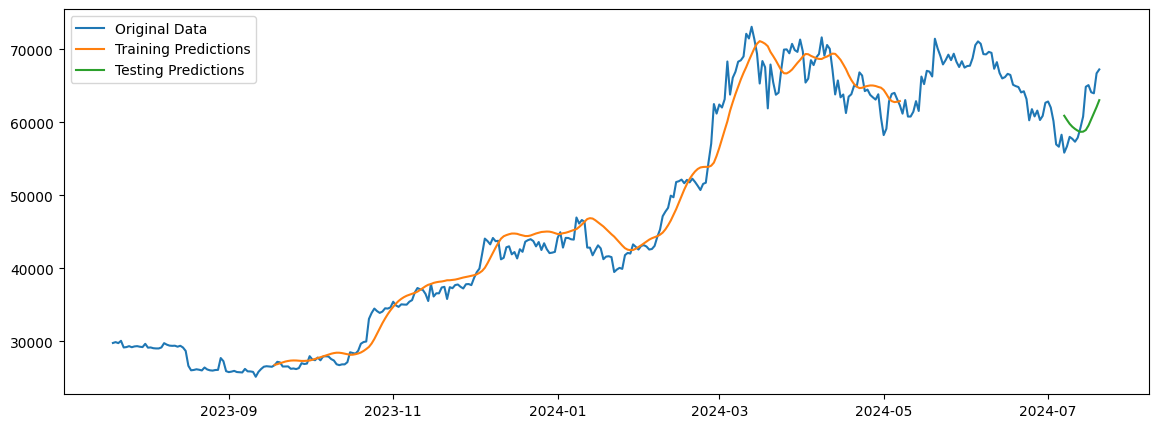

['Sell', 'Sell', 'Sell', 'Sell', 'Sell', 'Sell', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy']


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load data
data = pd.read_csv('/content/BTC-USD.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Preprocess data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Prepare training and testing data
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step):
        a = data[i:(i + time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 60
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer=Adam(), loss='mean_squared_error')
model.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=2)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))

# Plot results
plt.figure(figsize=(14, 5))
plt.plot(data.index, data['Close'], label='Original Data')

# Adjust indices to match the length of the predictions
train_predict_plot = np.empty_like(data['Close'])
train_predict_plot[:] = np.nan
train_predict_plot[time_step:len(train_predict)+time_step] = train_predict[:, 0]

test_predict_plot = np.empty_like(data['Close'])
test_predict_plot[:] = np.nan
test_predict_plot[len(train_predict)+(time_step*2):len(data)] = test_predict[:, 0]

plt.plot(data.index, train_predict_plot, label='Training Predictions')
plt.plot(data.index, test_predict_plot, label='Testing Predictions')
plt.legend()
plt.show()

# Strategy based on predictions
def buy_sell_signal(predictions):
    signal = []
    for i in range(1, len(predictions)):
        if predictions[i] > predictions[i - 1]:
            signal.append('Buy')
        else:
            signal.append('Sell')
    return signal

signals = buy_sell_signal(test_predict)
print(signals)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('/content/BTC-USD.csv')

In [ ]:
features = df[['Open', 'High', 'Low']]
target = df['Close']

In [ ]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [ ]:
X_train, X_valid, Y_train, Y_valid = train_test_split(features_scaled, target, test_size=0.1, random_state=2022)

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
Y_pred = model.predict(X_valid)

In [ ]:
mse = mean_squared_error(Y_valid, Y_pred)
print(f'MSE: {mse:.2f}')

MSE: 268825.90


In [ ]:
new_data = pd.read_csv('/content/BTC-USD.csv')
new_features = new_data[['Open', 'High', 'Low']]
new_features_scaled = scaler.transform(new_features)

In [ ]:
new_predictions = model.predict(new_features_scaled)

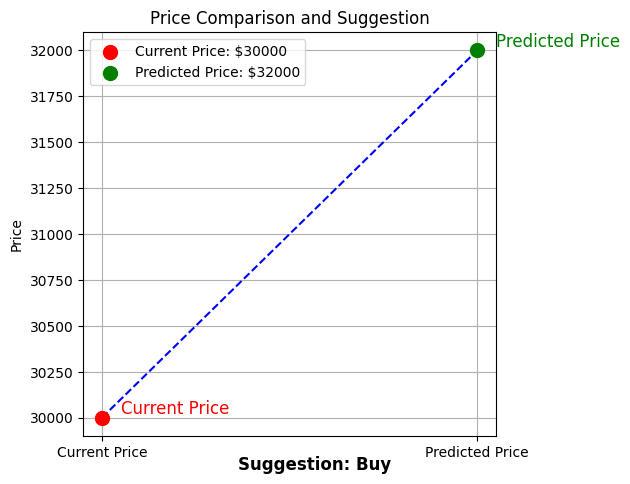

In [ ]:
import matplotlib.pyplot as plt

def suggest_buy_or_sell(current_price, predicted_price):
    if predicted_price > current_price:
        return 'Buy'
    elif predicted_price < current_price:
        return 'Sell'
    else:
        return 'Hold'

# Sample data
current_price = 30000
predicted_price = 32000  # Change this value to test different scenarios

# Get suggestion
suggestion = suggest_buy_or_sell(current_price, predicted_price)

# Visualization
fig, ax = plt.subplots()

# Plot current and predicted prices
ax.plot([1, 2], [current_price, predicted_price], marker='o', markersize=8, color='b', linestyle='--')
ax.scatter(1, current_price, color='r', label=f'Current Price: ${current_price}', s=100, zorder=5)
ax.scatter(2, predicted_price, color='g', label=f'Predicted Price: ${predicted_price}', s=100, zorder=5)

# Add text with suggestion
ax.text(1.05, current_price, 'Current Price', verticalalignment='bottom', horizontalalignment='left', color='r', fontsize=12)
ax.text(2.05, predicted_price, 'Predicted Price', verticalalignment='bottom', horizontalalignment='left', color='g', fontsize=12)

# Set labels and title
ax.set_xticks([1, 2])
ax.set_xticklabels(['Current Price', 'Predicted Price'])
ax.set_ylabel('Price')
ax.set_title('Price Comparison and Suggestion')

# Display suggestion
plt.figtext(0.5, 0.01, f'Suggestion: {suggestion}', ha='center', fontsize=12, color='black', weight='bold')

# Show plot
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import yfinance as yf

# Fetch historical data
def fetch_data():
    gold_data = yf.download('GC=F', start='2020-01-01', end='2024-07-01')
    gold_data['Date'] = gold_data.index
    gold_data.reset_index(drop=True, inplace=True)
    return gold_data

# Prepare features and labels
def prepare_features(data):
    data['Prev_Close'] = data['Close'].shift(1)
    data.dropna(inplace=True)
    X = data[['Prev_Close']]
    y = data['Close']
    return X, y

# Main function
def main():
    data = fetch_data()
    X, y = prepare_features(data)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Initialize and train model
    model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, predictions)
    print(f"Mean Absolute Error: {mae}")

    # Predict for August 2024
    last_close = data.iloc[-1]['Close']
    predicted_price = model.predict([[last_close]])[0]

    print(f"Predicted Gold Price for August 2024: {predicted_price}")

    # Decision based on prediction (Example logic)
    current_price = last_close
    if predicted_price > current_price:
        print("Suggestion: Buy")
    else:
        print("Suggestion: Sell")

if __name__ == "__main__":
    main()


[*********************100%%**********************]  1 of 1 completed


Mean Absolute Error: 115.95203338893114
Predicted Gold Price for August 2024: 2009.5509033203125
Suggestion: Sell


[*********************100%%**********************]  1 of 1 completed


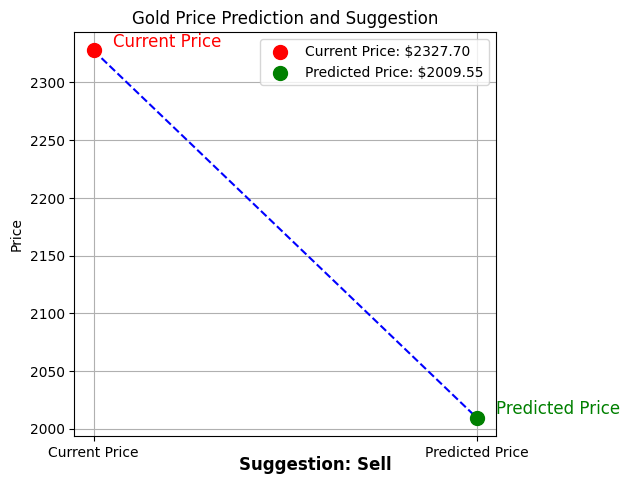

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch historical data
def fetch_data():
    gold_data = yf.download('GC=F', start='2020-01-01', end='2024-07-01')
    gold_data['Date'] = gold_data.index
    gold_data.reset_index(drop=True, inplace=True)
    return gold_data

# Prepare features and labels
def prepare_features(data):
    data['Prev_Close'] = data['Close'].shift(1)
    data.dropna(inplace=True)
    X = data[['Prev_Close']]
    y = data['Close']
    return X, y

# Suggestion function
def suggest_buy_or_sell(current_price, predicted_price):
    if predicted_price > current_price:
        return 'Buy'
    elif predicted_price < current_price:
        return 'Sell'
    else:
        return 'Hold'

# Main function
def main():
    data = fetch_data()
    X, y = prepare_features(data)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Initialize and train model
    model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
    model.fit(X_train, y_train)

    # Predict for August 2024
    last_close = data.iloc[-1]['Close']
    predicted_price = model.predict([[last_close]])[0]

    # Get suggestion
    suggestion = suggest_buy_or_sell(last_close, predicted_price)

    # Visualization
    fig, ax = plt.subplots()

    # Plot current and predicted prices
    ax.plot([1, 2], [last_close, predicted_price], marker='o', markersize=8, color='b', linestyle='--')
    ax.scatter(1, last_close, color='r', label=f'Current Price: ${last_close:.2f}', s=100, zorder=5)
    ax.scatter(2, predicted_price, color='g', label=f'Predicted Price: ${predicted_price:.2f}', s=100, zorder=5)

    # Add text with suggestion
    ax.text(1.05, last_close, 'Current Price', verticalalignment='bottom', horizontalalignment='left', color='r', fontsize=12)
    ax.text(2.05, predicted_price, 'Predicted Price', verticalalignment='bottom', horizontalalignment='left', color='g', fontsize=12)

    # Set labels and title
    ax.set_xticks([1, 2])
    ax.set_xticklabels(['Current Price', 'Predicted Price'])
    ax.set_ylabel('Price')
    ax.set_title('Gold Price Prediction and Suggestion')

    # Display suggestion
    plt.figtext(0.5, 0.01, f'Suggestion: {suggestion}', ha='center', fontsize=12, color='black', weight='bold')

    # Show plot
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()
